# Compare prod and dev

### Notebook configuration

In [1]:
dst_old_filename    = "$IC_DATA/dst_old.h5"
dst_new_filename    = "$IC_DATA/dst_new.h5"
correction_filename = "$IC_DATA/XYmaps/run4628_corrections.h5"

Zrange =  50,  550
Erange = 4e3, 14e3
Znbins = 50
Enbins = 50

# Plotting style
default_cmap = "viridis"
figure_size  = 16, 12
font_size    = 15

### Imports

In [2]:
import os
import time

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.fit_functions as fitf
import invisible_cities.reco.dst_functions as dstf

from invisible_cities.core .core_functions import in_range
from invisible_cities.icaro.hst_functions  import shift_to_bin_centers
from invisible_cities.icaro.hst_functions  import labels

%matplotlib inline

### Initialization

In [3]:
print("This notebook has been run on ", time.asctime())

This notebook has been run on  Tue Oct 31 16:48:02 2017


In [4]:
dst_old_filename    = os.path.expandvars(   dst_old_filename)
dst_new_filename    = os.path.expandvars(   dst_new_filename)
correction_filename = os.path.expandvars(correction_filename)

Zbins = np.linspace(*Zrange, Znbins+1)
Ebins = np.linspace(*Erange, Enbins+1)

Zcenters = shift_to_bin_centers(Zbins)
Zerror   = np.diff(Zbins) * 0.5

plt.rcParams["figure.figsize"] = figure_size
plt.rcParams[  "font.size"   ] =   font_size

### Read data

In [5]:
old = dstf.load_dst(dst_old_filename, "DST", "Events")
new = dstf.load_dst(dst_new_filename, "DST", "Events")

unique_events_old = ~old.event.duplicated()
unique_events_new = ~new.event.duplicated()

number_of_S2s_full_old  = np.size         (unique_events_old)
number_of_S2s_full_new  = np.size         (unique_events_new)
number_of_evts_full_old = np.count_nonzero(unique_events_old)
number_of_evts_full_new = np.count_nonzero(unique_events_new)

print(f"Total number of S2s   : old {number_of_S2s_full_old} new {number_of_S2s_full_new}")
print(f"Total number of events: old {number_of_evts_full_old} new {number_of_evts_full_new}")

Total number of S2s   : old 2216501 new 291152
Total number of events: old 1801462 new 118526


In [6]:
XYcorrection = dstf.load_xy_corrections(correction_filename,
                                        norm_strategy =  "index",
                                        norm_opts     = {"index": (25, 25)})

### Comparison between dev and filtered prod

In [7]:
new.columns

Index(['event', 'time', 'peak', 'nS2', 'S1w', 'S1h', 'S1e', 'S1t', 'S2w',
       'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z', 'X', 'Y', 'R', 'Phi',
       'Xrms', 'Yrms'],
      dtype='object')

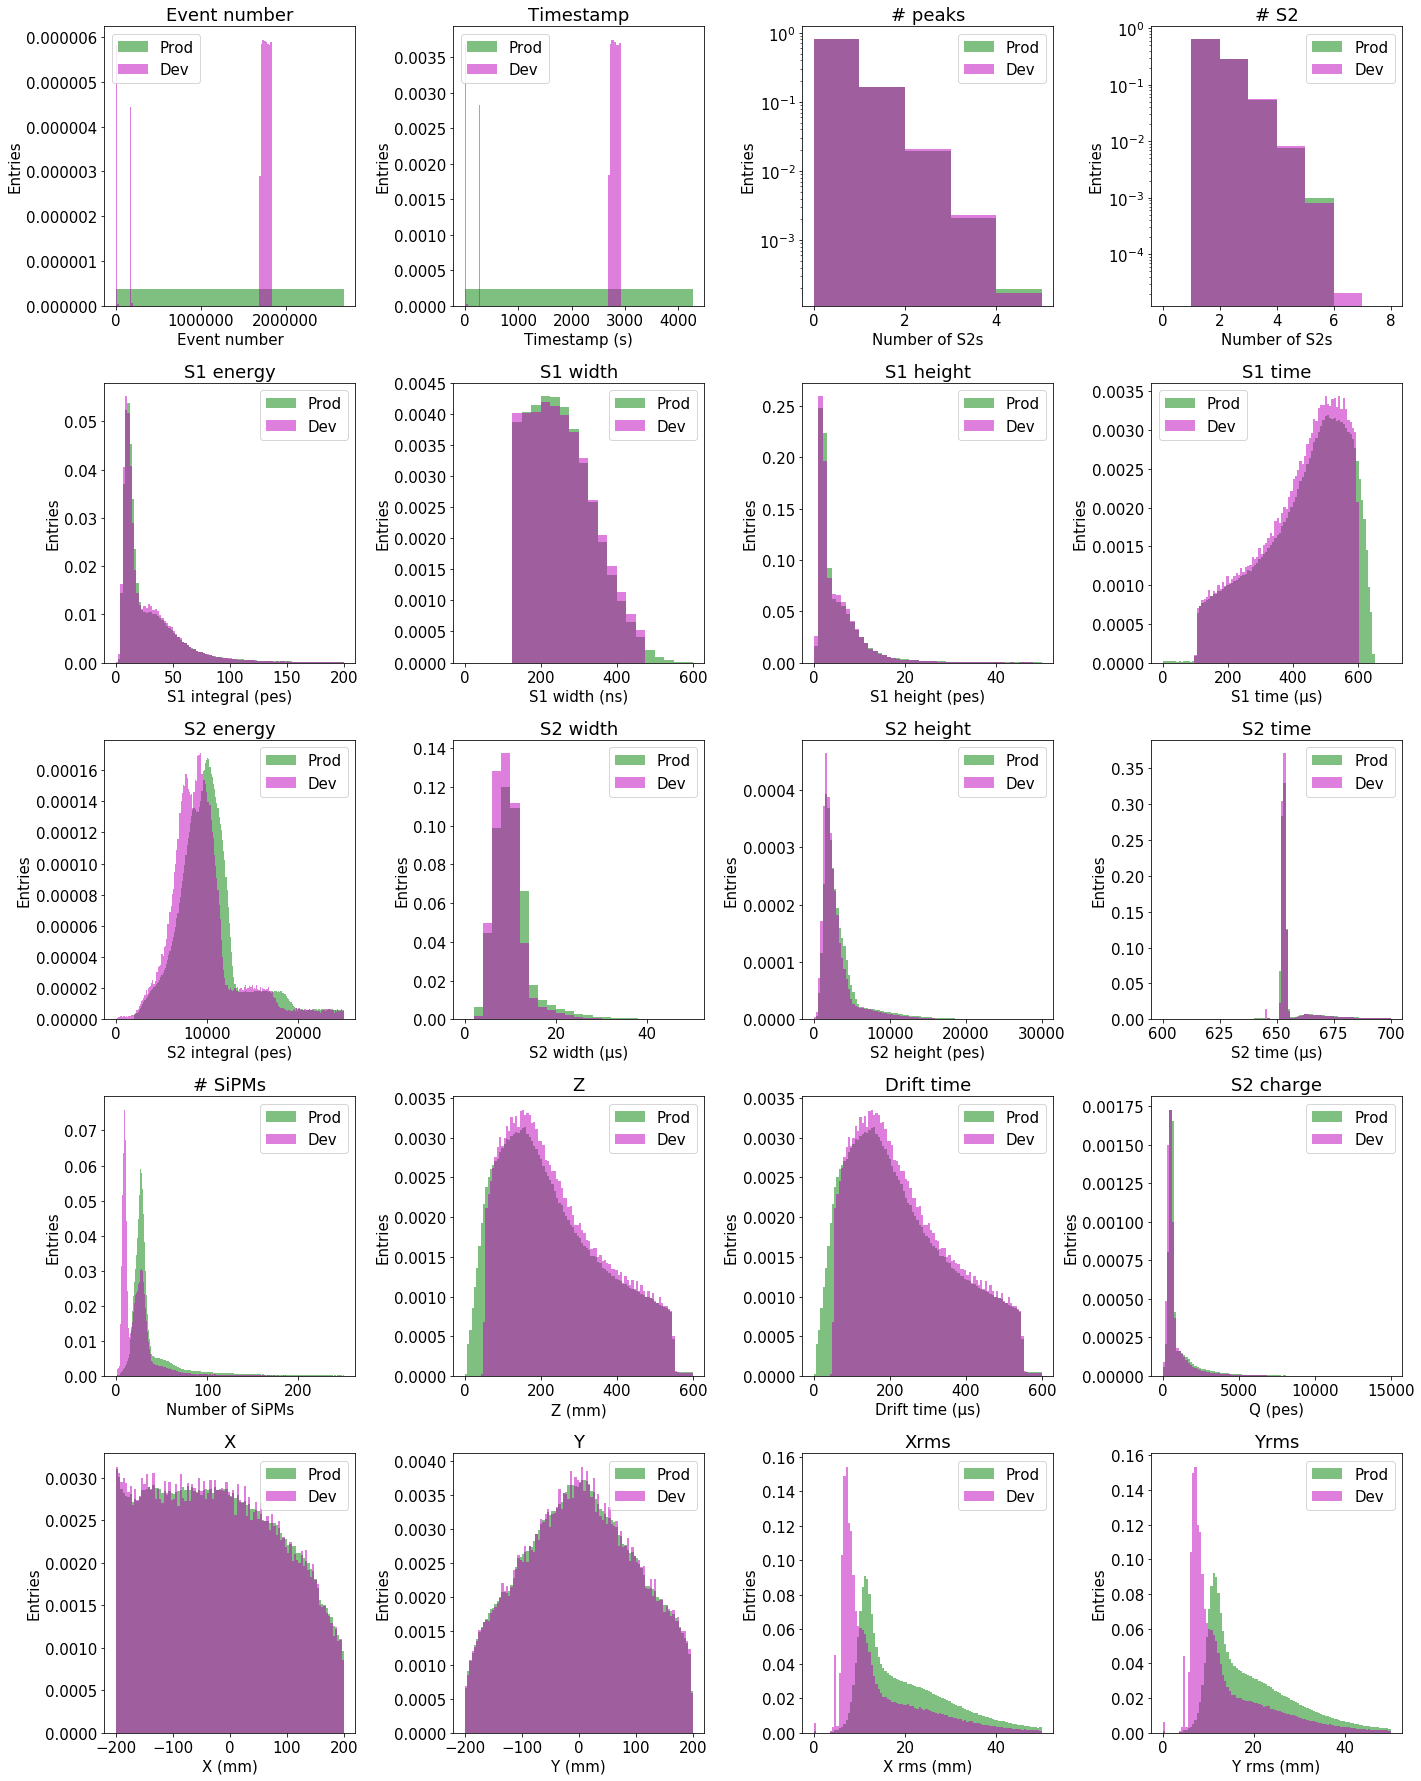

In [11]:
def double_hist(h1, h2, binning, label0="Prod", label1="Dev", **kwargs):
    plt.hist(h1, binning, label=label0, alpha=0.5, color="g", normed=True, **kwargs)
    plt.hist(h2, binning, label=label1, alpha=0.5, color="m", normed=True, **kwargs)
    plt.legend()

def shift_time(t):
    return (t - t.min())/60


nx, ny, n = 5, 4, 1
plt.figure(figsize=(5*ny,5*nx))

plt.subplot(nx, ny, n); n += 1
double_hist(old.event, new.event, 100)
labels("Event number", "Entries", "Event number")

plt.subplot(nx, ny, n); n += 1
double_hist(shift_time(old.time), shift_time(new.time), 100)
labels("Timestamp (s)", "Entries", "Timestamp")

plt.subplot(nx, ny, n); n += 1
double_hist(old.peak, new.peak, np.linspace(0, 5, 6))
plt.yscale("log")
labels("Number of S2s", "Entries", "# peaks")

plt.subplot(nx, ny, n); n += 1
double_hist(old.nS2, new.nS2, np.linspace(0, 8, 9))
plt.yscale("log")
labels("Number of S2s", "Entries", "# S2")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S1e, new.S1e, np.linspace(0, 200, 101))
labels("S1 integral (pes)", "Entries", "S1 energy")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S1w, new.S1w, np.linspace(0, 600, 25))
labels("S1 width (ns)", "Entries", "S1 width")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S1h, new.S1h, np.linspace(0, 50, 51))
labels("S1 height (pes)", "Entries", "S1 height")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S1t/1e3, new.S1t/1e3, np.linspace(0, 700, 101))
labels("S1 time (µs)", "Entries", "S1 time")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S2e, new.S2e, np.linspace(0, 25e3, 201))
labels("S2 integral (pes)", "Entries", "S2 energy")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S2w, new.S2w, np.linspace(0, 50, 26))
labels("S2 width (µs)", "Entries", "S2 width")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S2h, new.S2h, np.linspace(0, 3e4, 101))
labels("S2 height (pes)", "Entries", "S2 height")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S2t/1e3, new.S2t/1e3, np.linspace(600, 700, 101))
labels("S2 time (µs)", "Entries", "S2 time")

plt.subplot(nx, ny, n); n += 1
double_hist(old.Nsipm, new.Nsipm, np.linspace(0, 250, 251))
labels("Number of SiPMs", "Entries", "# SiPMs")

plt.subplot(nx, ny, n); n += 1
double_hist(old.Z, new.Z, np.linspace(0, 600, 101))
labels("Z (mm)", "Entries", "Z")

plt.subplot(nx, ny, n); n += 1
double_hist(old.DT, new.DT, np.linspace(0, 600, 101))
labels("Drift time (µs)", "Entries", "Drift time")

plt.subplot(nx, ny, n); n += 1
double_hist(old.S2q, new.S2q, np.linspace(0, 15e3, 101))
labels("Q (pes)", "Entries", "S2 charge")

plt.subplot(nx, ny, n); n += 1
double_hist(old.X, new.X, np.linspace(-200, 200, 101))
labels("X (mm)", "Entries", "X")

plt.subplot(nx, ny, n); n += 1
double_hist(old.Y, new.Y, np.linspace(-200, 200, 101))
labels("Y (mm)", "Entries", "Y")

plt.subplot(nx, ny, n); n += 1
double_hist(old.Xrms, new.Xrms, np.linspace(0, 50, 101))
labels("X rms (mm)", "Entries", "Xrms")

plt.subplot(nx, ny, n); n += 1
double_hist(old.Yrms, new.Yrms, np.linspace(0, 50, 101))
labels("Y rms (mm)", "Entries", "Yrms")

plt.tight_layout()